In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in data:
demographic_df = pd.read_csv("./data/demographic_info.csv") 
eeg_df = pd.read_csv("./data/EEG_data.csv")

In [3]:
demographic_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [4]:
eeg_df = eeg_df.copy()
eeg_df.rename(columns={"Mediation": "Meditation", "user-definedlabeln": "userdefinedlabel"}, inplace=True)
eeg_df

,SubjectID,VideoID,Attention,Meditation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,userdefinedlabel
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [5]:
# check for missing data
def ismissing(col):
    return eeg_df[col].isna().sum()

for col in eeg_df.columns:
    if ismissing(col) != 0:
        print(f'{col} is missing data')

In [6]:
# subject 1
eeg_df[eeg_df['SubjectID'] == 0]

,SubjectID,VideoID,Attention,Meditation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,userdefinedlabel
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.0,9.0,63.0,53.0,60.0,143923.0,24122.0,2922.0,5678.0,4067.0,6919.0,5734.0,6978.0,1.0,0.0
1257,0.0,9.0,67.0,35.0,-72.0,234752.0,24787.0,975.0,2834.0,3287.0,7684.0,5798.0,7865.0,1.0,0.0
1258,0.0,9.0,80.0,35.0,117.0,68376.0,33723.0,19605.0,23755.0,20823.0,29481.0,25891.0,7752.0,1.0,0.0
1259,0.0,9.0,69.0,35.0,11.0,143803.0,119188.0,12399.0,11924.0,60105.0,48439.0,36495.0,10540.0,1.0,0.0


In [7]:
print(eeg_df[['SubjectID']].value_counts())

SubjectID
3.0          1314
1.0          1301
4.0          1295
2.0          1284
8.0          1282
7.0          1276
6.0          1275
5.0          1262
0.0          1261
9.0          1261
dtype: int64


In [8]:
print(eeg_df[['VideoID']].value_counts())

VideoID
1.0        1414
0.0        1412
4.0        1356
9.0        1281
8.0        1280
2.0        1274
5.0        1230
3.0        1206
6.0        1181
7.0        1177
dtype: int64


In [9]:
print(eeg_df[['VideoID', 'SubjectID']].value_counts())

VideoID  SubjectID
0.0      0.0          144
         9.0          144
4.0      2.0          144
         1.0          144
         6.0          144
                     ... 
6.0      3.0          113
7.0      6.0          113
         2.0          113
         0.0          112
         9.0          112
Length: 100, dtype: int64


# Statistical Analysis

In [10]:
import statistics

data = eeg_df.copy()

for feature in data:
    print(feature)
    print("mean: ", statistics.mean(data[feature]))
    print("median: ", statistics.median(data[feature]))
    print("mode: ",statistics.mode(data[feature]))
    print("variance: ",statistics.variance(data[feature]))
    print("standard deviation: ",statistics.stdev(data[feature]))
    
    lower_percentile = data[feature].quantile(0.01)
    upper_percentile = data[feature].quantile(0.99)
    print("1st percentile: ", lower_percentile)
    print("99th percentile: ", upper_percentile)
    print("minimum value: ", data[feature].min())
    print("maximum value: ", data[feature].max())
    
    print()

SubjectID
mean:  4.487393646085395
median:  4.0
mode:  3.0
variance:  8.210360193118095
standard deviation:  2.8653726098219923
1st percentile:  0.0
99th percentile:  9.0
minimum value:  0.0
maximum value:  9.0

VideoID
mean:  4.390601826555304
median:  4.0
mode:  1.0
variance:  8.486918693201972
standard deviation:  2.9132316580048987
1st percentile:  0.0
99th percentile:  9.0
minimum value:  0.0
maximum value:  9.0

Attention
mean:  41.31387089220201
median:  43.0
mode:  0.0
variance:  536.0592447417998
standard deviation:  23.152953261772023
1st percentile:  0.0
99th percentile:  91.0
minimum value:  0.0
maximum value:  100.0

Meditation
mean:  47.18265553040356
median:  51.0
mode:  0.0
variance:  513.2932541810192
standard deviation:  22.65597612509819
1st percentile:  0.0
99th percentile:  90.0
minimum value:  0.0
maximum value:  100.0

Raw
mean:  65.57075950355164
median:  35.0
mode:  2047.0
variance:  357509.5644501569
standard deviation:  597.921035296599
1st percentile:  -2048

In [11]:
# see if predefined labels match the user defined labels
agreement = (eeg_df['predefinedlabel'] == eeg_df['userdefinedlabel']).mean()
print(f"Agreement between predefined and user-defined labels: {agreement:.2%}")

Agreement between predefined and user-defined labels: 48.81%


- Agreement being low suggests that confusion is subjective and depends on the individual

# Graphs

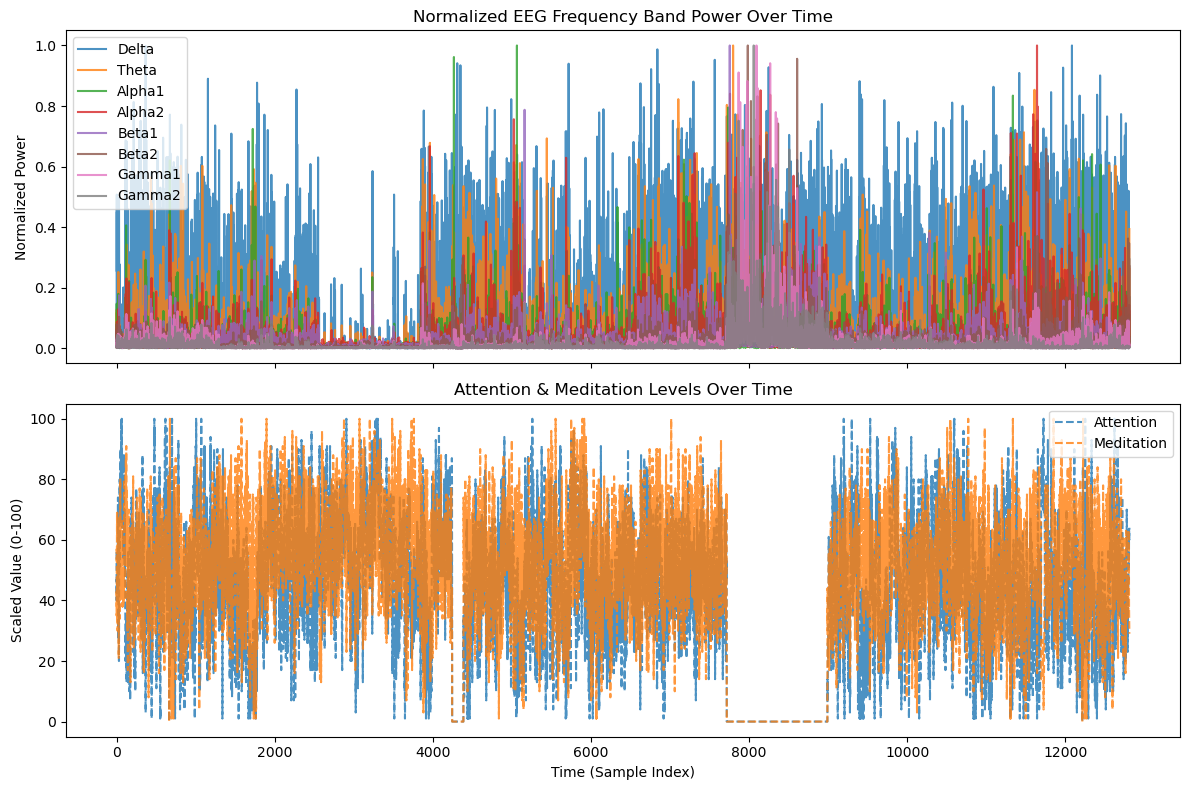

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Define EEG features and other cognitive metrics
eeg_bands = ["Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]
attention_meditation = ["Attention", "Meditation"]

# Normalize EEG band power values using Min-Max Scaling
scaler = MinMaxScaler()
eeg_df[eeg_bands] = scaler.fit_transform(eeg_df[eeg_bands])

# Create subplots: One for EEG frequency bands, one for Attention & Meditation
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot EEG frequency bands
for band in eeg_bands:
    axes[0].plot(eeg_df.index, eeg_df[band], label=band, alpha=0.8)

axes[0].set_title("Normalized EEG Frequency Band Power Over Time")
axes[0].set_ylabel("Normalized Power")
axes[0].legend()

# Plot Attention & Meditation separately
for metric in attention_meditation:
    axes[1].plot(eeg_df.index, eeg_df[metric], label=metric, linestyle="dashed", alpha=0.8)

axes[1].set_title("Attention & Meditation Levels Over Time")
axes[1].set_xlabel("Time (Sample Index)")
axes[1].set_ylabel("Scaled Value (0-100)")
axes[1].legend()

plt.tight_layout()
plt.show()

In [13]:
# Select relevant columns for plotting
time_series_features = ["Attention", "Meditation", "Raw", "Delta", "Theta", 
                        "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", 
                        "Gamma2", "predefinedlabel", "userdefinedlabel"]

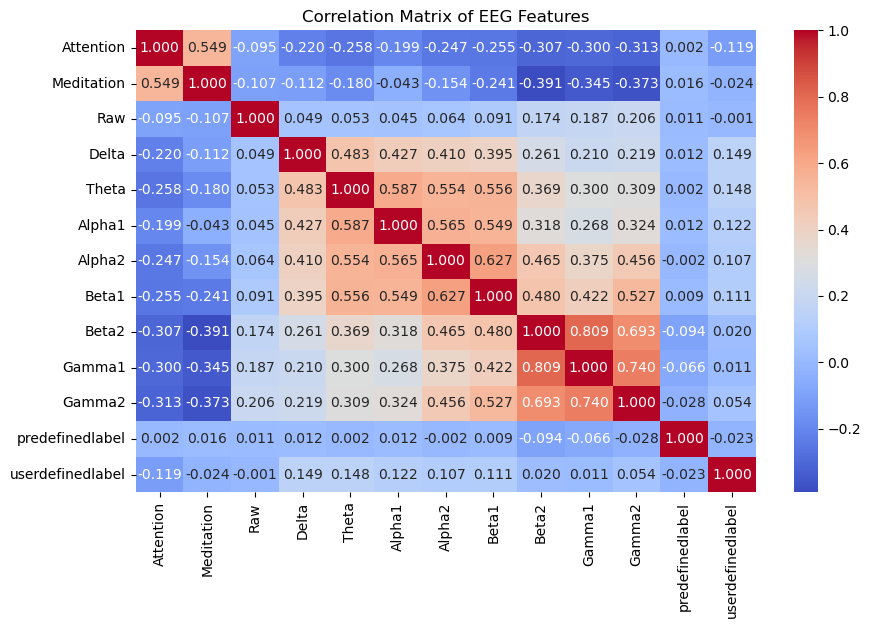

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(eeg_df[time_series_features].corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix of EEG Features")
plt.show()

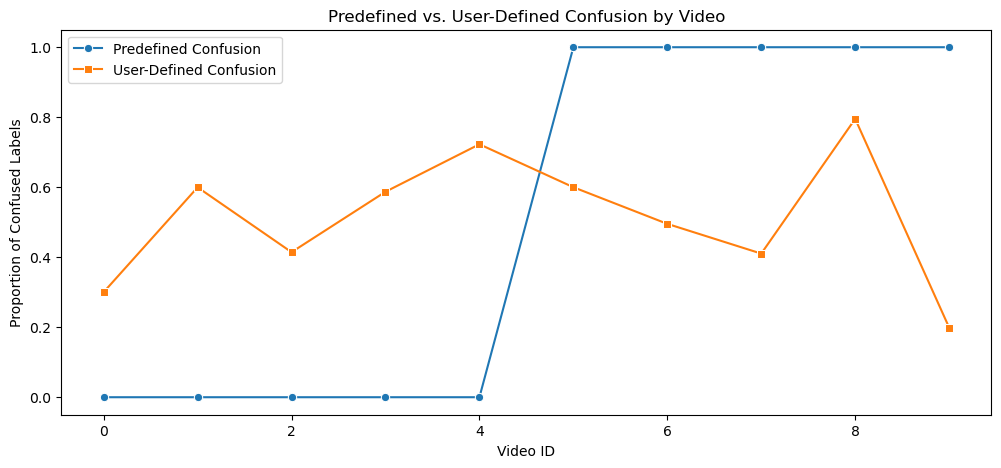

In [15]:
# Compute the percentage of confused labels for each video
confusion_predefined = eeg_df.groupby("VideoID")["predefinedlabel"].mean()
confusion_user = eeg_df.groupby("VideoID")["userdefinedlabel"].mean()

# Plot both
plt.figure(figsize=(12, 5))
sns.lineplot(x=confusion_predefined.index, y=confusion_predefined, marker="o", label="Predefined Confusion")
sns.lineplot(x=confusion_user.index, y=confusion_user, marker="s", label="User-Defined Confusion")

plt.xlabel("Video ID")
plt.ylabel("Proportion of Confused Labels")
plt.title("Predefined vs. User-Defined Confusion by Video")
plt.legend()
plt.show()

- For non confusing videos, students found them confusing showing that "easy" videos were actually confusing
- For confusing videos, students found them less confusing showing that "hard"  videos were not as hard as expected

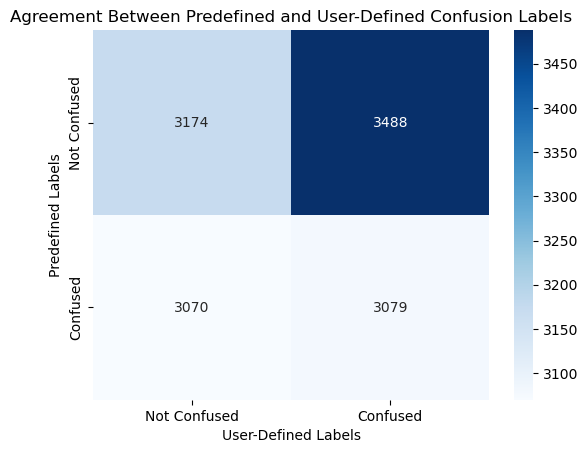

In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(eeg_df["predefinedlabel"], eeg_df["userdefinedlabel"])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Confused", "Confused"], 
            yticklabels=["Not Confused", "Confused"])
plt.xlabel("User-Defined Labels")
plt.ylabel("Predefined Labels")
plt.title("Agreement Between Predefined and User-Defined Confusion Labels")
plt.show()

# Statistical Test

#### Predefined Label

In [17]:
from scipy.stats import ttest_ind

# Separate the data into confused and not confused
confused_data = eeg_df[eeg_df['predefinedlabel'] == 1]
not_confused_data = eeg_df[eeg_df['predefinedlabel'] == 0]

# Perform t-tests for each EEG band
for band in eeg_bands:
    t_stat, p_value = ttest_ind(confused_data[band], not_confused_data[band])
    print(f"{band} - t-statistic: {t_stat:.4f}, p-value: {p_value:.10f}")

Delta - t-statistic: 1.3960, p-value: 0.1627483281
Theta - t-statistic: 0.1813, p-value: 0.8561083926
Alpha1 - t-statistic: 1.3358, p-value: 0.1816233725
Alpha2 - t-statistic: -0.2081, p-value: 0.8351751753
Beta1 - t-statistic: 0.9669, p-value: 0.3336225461
Beta2 - t-statistic: -10.6300, p-value: 0.0000000000
Gamma1 - t-statistic: -7.4591, p-value: 0.0000000000
Gamma2 - t-statistic: -3.2159, p-value: 0.0013038107


- Some of these frequency bands have p-values < 0.05, which indicates that there are significant differences between the "confused" and "not confused" states for these frequency bands.
- Beta2, Gamma1, and Gamma2 appear to be the most relevant bands in predicting confusion based on the statistical test.

#### User Defined Label

In [18]:
# Separate the data into confused and not confused
confused_data = eeg_df[eeg_df['userdefinedlabel'] == 1]
not_confused_data = eeg_df[eeg_df['userdefinedlabel'] == 0]

# Perform t-tests for each EEG band
for band in eeg_bands:
    t_stat, p_value = ttest_ind(confused_data[band], not_confused_data[band])
    print(f"{band} - t-statistic: {t_stat:.4f}, p-value: {p_value:.10f}")

Delta - t-statistic: 17.0055, p-value: 0.0000000000
Theta - t-statistic: 16.8850, p-value: 0.0000000000
Alpha1 - t-statistic: 13.8781, p-value: 0.0000000000
Alpha2 - t-statistic: 12.2073, p-value: 0.0000000000
Beta1 - t-statistic: 12.6963, p-value: 0.0000000000
Beta2 - t-statistic: 2.2137, p-value: 0.0268672051
Gamma1 - t-statistic: 1.2808, p-value: 0.2002833684
Gamma2 - t-statistic: 6.0674, p-value: 0.0000000013


- Most of these frequency bands have p-values < 0.05, which indicates that there are significant differences between the "confused" and "not confused" states for these frequency bands.
- Delta, Theta, Alpha1, Alpha2, Beta1, Beta2, and Gamma2 appear to be the most relevant bands in predicting confusion based on the statistical test.

# SVM Model

#### Predefined Labels

In [19]:
from sklearn.model_selection import GroupShuffleSplit

relevant_bands = ['Beta1', 'Beta2','Gamma2']

# Select EEG frequency band features
X = eeg_df[relevant_bands]

# Select EEG frequency band features
y = eeg_df['predefinedlabel']

# Ensure split by videoID
groups = eeg_df['VideoID']

# Grouped train-test split: Ensures no video is in both sets
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVC

# Train an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [22]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Compute accuracy and classification report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=["Not Confused", "Confused"])

# Print results
print("Predefined SVM Accuracy:", accuracy_svm)
print("Classification Report (Predefined):\n", report_svm)

Predefined SVM Accuracy: 0.5434298440979956
Classification Report (Predefined):
               precision    recall  f1-score   support

Not Confused       0.55      0.70      0.62      1414
    Confused       0.53      0.37      0.44      1280

    accuracy                           0.54      2694
   macro avg       0.54      0.54      0.53      2694
weighted avg       0.54      0.54      0.53      2694



#### User Defined Labels

In [24]:
relevant_bands = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma2']

# Select EEG frequency band features
X = eeg_df[relevant_bands]

# Select EEG frequency band features
y = eeg_df['userdefinedlabel']

# Ensure we split by VideoID
groups = eeg_df['VideoID']

# Grouped train-test split: Ensures no video is in both sets
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [27]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [28]:
# Compute accuracy and classification report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=["Not Confused", "Confused"])

# Print results
print("User-Defined Label SVM Accuracy:", accuracy_svm)
print("Classification Report (User-Defined):\n", report_svm)

User-Defined Label SVM Accuracy: 0.48292501855976244
Classification Report (User-Defined):
               precision    recall  f1-score   support

Not Confused       0.33      0.68      0.45       828
    Confused       0.74      0.40      0.51      1866

    accuracy                           0.48      2694
   macro avg       0.53      0.54      0.48      2694
weighted avg       0.61      0.48      0.49      2694



# XG Boost

In [29]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

#### Predefined Labels

In [30]:
relevant_bands = ['Beta1', 'Beta2','Gamma2']

# Select EEG frequency band features
X = eeg_df[relevant_bands]

# Select EEG frequency band features
y = eeg_df['predefinedlabel']  # Binary target: 0 = Not Confused, 1 = Confused

# Ensure we split by VideoID
groups = eeg_df['VideoID']

# Grouped train-test split: Ensures no video is in both sets
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [31]:
# Normalize EEG features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train an XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, 
                          random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

C:\Users\lsese\miniforge3\envs\dsc80\lib\site-packages\xgboost\core.py:158: UserWarning: [11:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [34]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Not Confused", "Confused"])

# print results
print("Predefined XGBoost Accuracy:", accuracy_xgb)
print("Classification Report (Predefined):\n", report_xgb)

Predefined XGBoost Accuracy: 0.5374907201187825
Classification Report (Predefined):
               precision    recall  f1-score   support

Not Confused       0.56      0.52      0.54      1414
    Confused       0.51      0.56      0.53      1280

    accuracy                           0.54      2694
   macro avg       0.54      0.54      0.54      2694
weighted avg       0.54      0.54      0.54      2694



#### User Defined Labels

In [35]:
# Select EEG frequency band features
relevant_bands = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma2']
X = eeg_df[relevant_bands]

# Select EEG frequency band features
y = eeg_df['userdefinedlabel']  # Binary target: 0 = Not Confused, 1 = Confused

# Ensure we split by VideoID
groups = eeg_df['VideoID']

# Grouped train-test split: Ensures no video is in both sets
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [36]:
# Normalize EEG features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Train an XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, 
                          random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

C:\Users\lsese\miniforge3\envs\dsc80\lib\site-packages\xgboost\core.py:158: UserWarning: [11:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [38]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [39]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Not Confused", "Confused"])

# print results
print("User-Defined XGBoost Accuracy:", accuracy_xgb)
print("Classification Report (User-Defined):\n", report_xgb)

User-Defined XGBoost Accuracy: 0.5219005196733482
Classification Report (User-Defined):
               precision    recall  f1-score   support

Not Confused       0.34      0.62      0.44       828
    Confused       0.74      0.48      0.58      1866

    accuracy                           0.52      2694
   macro avg       0.54      0.55      0.51      2694
weighted avg       0.62      0.52      0.54      2694



Results:
    
1. Predefined labels perform better than user-defined labels in both models.
    - This makes sense because predefined labels are based on experimenter expectations, making them more consistent across samples.
    - User-defined labels have higher variability (students perceive confusion differently), making it harder for the model to learn patterns.

2. XGBoost outperforms SVM in both cases.
     - XGBoost does slightly better (~2-3%) because it's better at handling nonlinear relationships and noisy data (like EEG).
     - XGBoost recall is higher for "Confused" → meaning it detects confusion better than SVM.
     
3. Your dataset has more "Confused" labels than "Not Confused", especially in user-defined labels (1866 vs. 828).
    - This imbalanced data causes:
        - Lower precision for "Not Confused" → Model struggles to correctly identify non-confused states.
        - Higher recall for "Confused" → Model is more sensitive to detecting confusion. => CHECK
        - Lower overall accuracy because the model is biased toward "Confused."

# Attention Level Compared to Band Power

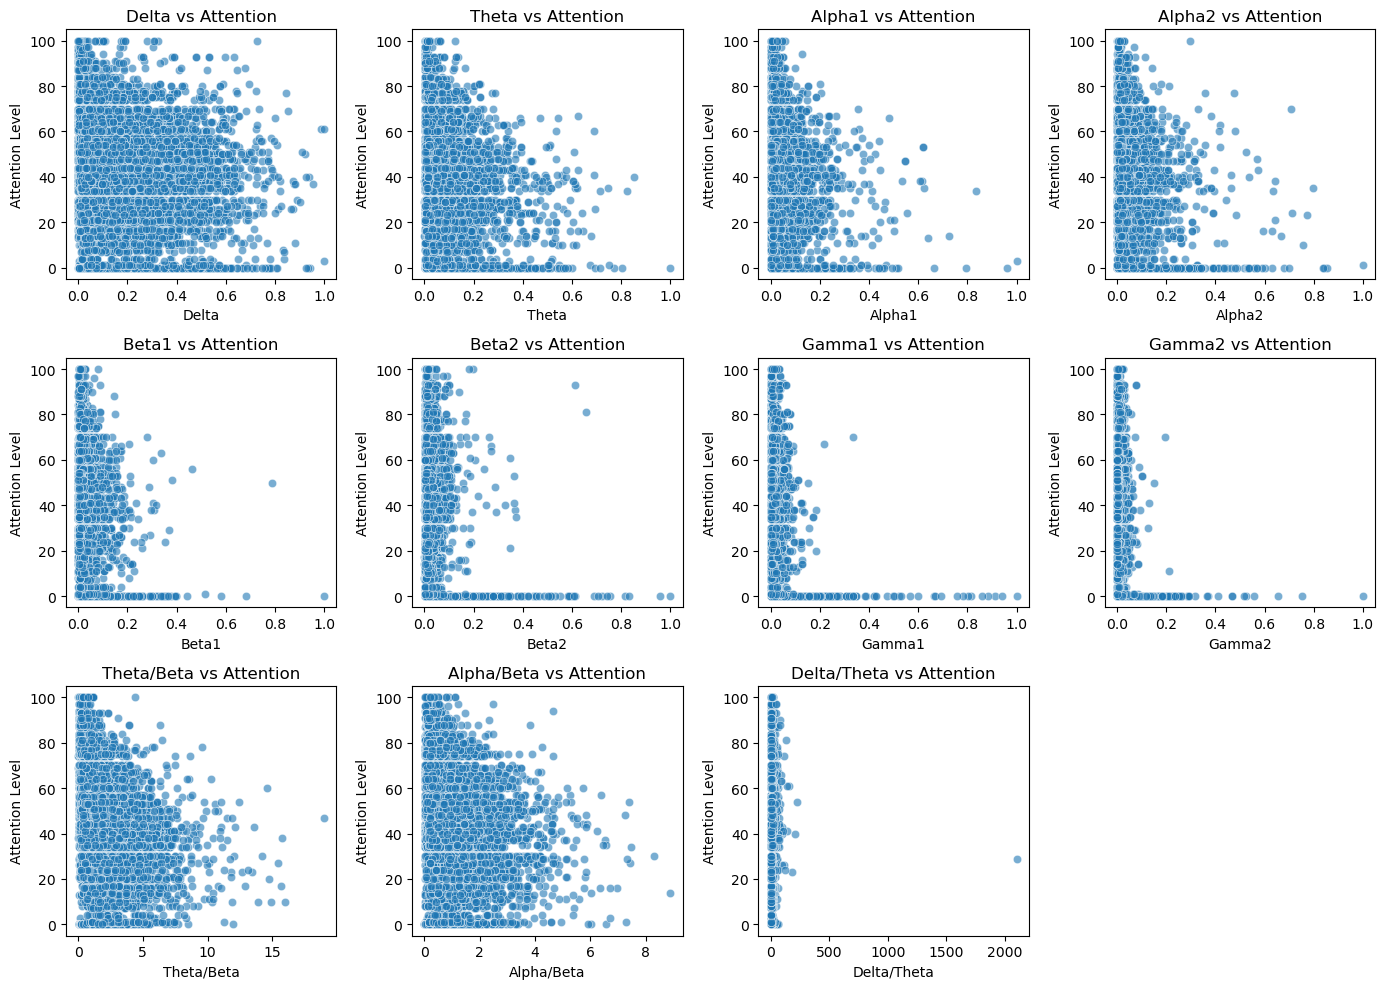

Correlation between EEG bands/ratios and Attention level:
Delta         -0.220403
Theta         -0.258356
Alpha1        -0.198662
Alpha2        -0.247011
Beta1         -0.255361
Beta2         -0.306624
Gamma1        -0.299903
Gamma2        -0.312734
Theta/Beta          NaN
Alpha/Beta    -0.071147
Delta/Theta         NaN
dtype: float64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'eeg_df' and contains the necessary columns
corr_df = eeg_df.copy()

# Create new columns for EEG band ratios
corr_df['Theta/Beta'] = eeg_df['Theta'] / (eeg_df['Beta1'] + eeg_df['Beta2'])
corr_df['Alpha/Beta'] = eeg_df['Alpha1'] / (eeg_df['Beta1'] + eeg_df['Beta2'])
corr_df['Delta/Theta'] = eeg_df['Delta'] / eeg_df['Theta']

# List of frequency bands and ratios to analyze
features = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 
            'Gamma2', 'Theta/Beta', 'Alpha/Beta', 'Delta/Theta']

# Plotting EEG bands and their ratios against the Attention level
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Creating a 3x4 grid of subplots
    sns.scatterplot(x=corr_df[feature], y=corr_df['Attention'], alpha=0.6)
    plt.title(f'{feature} vs Attention')
    plt.xlabel(feature)
    plt.ylabel('Attention Level')

plt.tight_layout()
plt.show()

# Calculate correlations between EEG bands/ratios and Attention level
correlations = corr_df[features].corrwith(corr_df['Attention'])
print("Correlation between EEG bands/ratios and Attention level:")
print(correlations)